In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import pylab
pylab.rcParams['figure.figsize'] = (20.0, 16.0)
%matplotlib inline

In [2]:
questions_pd = pd.read_csv("/Users/ddigges/Downloads/stacklite/questions.csv", parse_dates=["ClosedDate", "CreationDate", "DeletionDate"])
questions_pd.head()

,Id,CreationDate,ClosedDate,DeletionDate,Score,OwnerUserId,AnswerCount
0,1,2008-07-31 21:26:37,NaT,2011-03-28 00:53:47,1,NaN,0.0
1,4,2008-07-31 21:42:52,NaT,NaT,458,8.0,13.0
2,6,2008-07-31 22:08:08,NaT,NaT,207,9.0,5.0
3,8,2008-07-31 23:33:19,2013-06-03 04:00:25,2015-02-11 08:26:40,42,NaN,8.0
4,9,2008-07-31 23:40:59,NaT,NaT,1410,1.0,58.0


In [14]:
tags_pd = pd.read_csv("/Users/ddigges/Downloads/stacklite/question_tags.csv")
tags_pd.head()

,Id,Tag
0,1,data
1,4,c#
2,4,winforms
3,4,type-conversion
4,4,decimal


In [4]:
questions_pd.dtypes

Id                       int64
CreationDate    datetime64[ns]
ClosedDate      datetime64[ns]
DeletionDate    datetime64[ns]
Score                    int64
OwnerUserId            float64
AnswerCount            float64
dtype: object

In [5]:
questions_pd = questions_pd[pd.notnull(questions_pd.ClosedDate)]
questions_pd.head()

,Id,CreationDate,ClosedDate,DeletionDate,Score,OwnerUserId,AnswerCount
3,8,2008-07-31 23:33:19,2013-06-03 04:00:25,2015-02-11 08:26:40,42,NaN,8.0
11,23,2008-08-01 12:09:41,2012-05-18 11:12:42,2012-12-13 18:04:53,25,NaN,8.0
27,85,2008-08-01 14:19:52,2015-10-22 13:43:51,NaT,83,59.0,12.0
29,90,2008-08-01 14:41:24,2012-12-26 03:45:49,NaT,146,58.0,3.0
31,108,2008-08-01 15:22:29,2012-08-15 19:45:13,NaT,34,72.0,8.0


In [79]:
questions_pd['closing_time'] = (questions_pd.ClosedDate - questions_pd.CreationDate)
questions_pd['days'] = questions_pd['closing_time'].apply(lambda x: float(x.days))
questions_pd['seconds'] = questions_pd['closing_time'].apply(lambda x: float(x.seconds))

questions_pd.head()


,Id,CreationDate,ClosedDate,DeletionDate,Score,OwnerUserId,AnswerCount,closing_time,days,seconds
3,8,2008-07-31 23:33:19,2013-06-03 04:00:25,2015-02-11 08:26:40,42,NaN,8.0,1767 days 04:27:06,1767.0,16026.0
11,23,2008-08-01 12:09:41,2012-05-18 11:12:42,2012-12-13 18:04:53,25,NaN,8.0,1385 days 23:03:01,1385.0,82981.0
27,85,2008-08-01 14:19:52,2015-10-22 13:43:51,NaT,83,59.0,12.0,2637 days 23:23:59,2637.0,84239.0
29,90,2008-08-01 14:41:24,2012-12-26 03:45:49,NaT,146,58.0,3.0,1607 days 13:04:25,1607.0,47065.0
31,108,2008-08-01 15:22:29,2012-08-15 19:45:13,NaT,34,72.0,8.0,1475 days 04:22:44,1475.0,15764.0


In [80]:
max(questions_pd.days)

3098.0

In [81]:
joined_df = questions_pd.merge(tags_pd, on="Id")
joined_df.head()

,Id,CreationDate,ClosedDate,DeletionDate,Score,OwnerUserId,AnswerCount,closing_time,days,seconds,Tag
0,8,2008-07-31 23:33:19,2013-06-03 04:00:25,2015-02-11 08:26:40,42,NaN,8.0,1767 days 04:27:06,1767.0,16026.0,c#
1,8,2008-07-31 23:33:19,2013-06-03 04:00:25,2015-02-11 08:26:40,42,NaN,8.0,1767 days 04:27:06,1767.0,16026.0,code-generation
2,8,2008-07-31 23:33:19,2013-06-03 04:00:25,2015-02-11 08:26:40,42,NaN,8.0,1767 days 04:27:06,1767.0,16026.0,j#
3,8,2008-07-31 23:33:19,2013-06-03 04:00:25,2015-02-11 08:26:40,42,NaN,8.0,1767 days 04:27:06,1767.0,16026.0,visualj#
4,23,2008-08-01 12:09:41,2012-05-18 11:12:42,2012-12-13 18:04:53,25,NaN,8.0,1385 days 23:03:01,1385.0,82981.0,php


In [85]:
max_values = joined_df.groupby('Tag').days.aggregate(np.median)

In [86]:
max_values.sort_values(inplace=True)

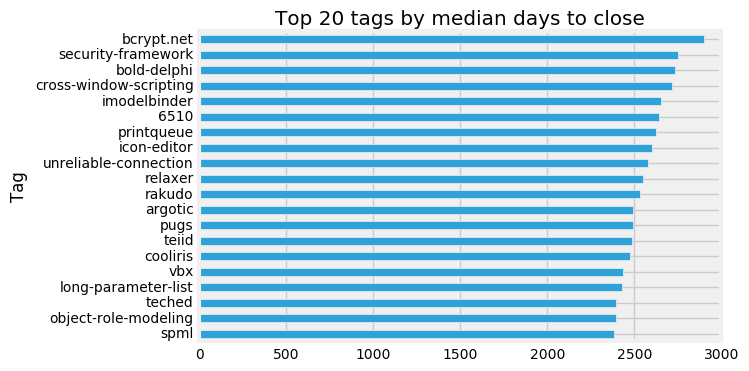

In [105]:
max_values.tail(20).plot.barh()
plt.title("Top 20 tags by median days to close");

In [106]:
min_values = joined_df.groupby('Tag').seconds.aggregate(np.median)
min_values.sort_values(inplace=True)
min_values.head(100)


Tag
bitfield                    10.0
army                        12.0
sucking                     15.0
hairy                       15.0
fuckuz                      16.0
rhsttrh                     16.0
suck                        19.0
dsdfdsfsd                   19.0
that                        19.0
dicksucka                   19.0
cock                        19.0
cocks                       22.5
jquery-trigger              24.0
hjgg                        28.0
estimates                   28.0
slut                        30.0
filesystemdalemar.myopen    31.0
eee                         31.0
rtaudio                     31.0
sql-escaping                32.0
databse                     33.0
charge                      34.0
hourly                      34.0
mcard                       35.0
pgmagick                    35.0
mortgage-rates              35.0
zone-files                  35.0
pvs-studio                  36.0
question-is-spam            36.0
npm-liveserver              38.0
      